In [1]:
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
import logging


def allow_soft_placement():
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    if  len(physical_devices) == 0:
        logging.warning("Not enough GPU hardware devices available")
    else:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)

allow_soft_placement()

import os
os.chdir('../src/models/')

import sys
from dotenv import load_dotenv, find_dotenv
import numpy as np
import pandas as pd
from hyperopt import space_eval
sys.path.append(os.path.abspath("../.."))
# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()
# load up the entries as environment variables
load_dotenv(dotenv_path)
# import pandas as pd

import random
import matplotlib.pyplot as plt
from src.code_snippets.utils.data_handler import read_pickle,save_to_pickle
from src.code_snippets.models.many_to_one_lstm import BidirectionalLSTM
from src.code_snippets.models.hyperparameter_tuning import safeHyperopt,extract_trial_results
import seaborn as sns


In [2]:
seed = 100
random.seed(seed)
np.random.seed(seed)

In [7]:
train_data = read_pickle('../../data/processed/processed_data_train.pickle')
val_data = read_pickle('../../data/processed/processed_data_val.pickle')
test_data = read_pickle('../../data/processed/processed_data_test.pickle')


In [4]:
num_observations = len(train_data['X_aux'])
idx = np.arange(num_observations)

sample_portion = 0.1
sample_size = int(num_observations*sample_portion)
print(sample_size)

12292


In [5]:
num_gpus_available = len(tf.config.experimental.list_physical_devices('GPU'))
assert num_gpus_available == 1, 'GPU IS NOT AVAILABLE' 
print("Num GPUs Available: ",num_gpus_available )

Num GPUs Available:  1


In [8]:
np.random.seed(seed)
sampled_idx = np.random.choice(idx,sample_size,replace = False)

use_sample = False

if use_sample:
    train_data['X_indices'] = train_data['X_indices'][sampled_idx]
    train_data['X_aux'] = train_data['X_aux'][sampled_idx]
    train_data['y'] = train_data['y'][sampled_idx]
else:
    train_data['X_indices'] = train_data['X_indices']
    train_data['X_aux'] = train_data['X_aux']
    train_data['y'] = train_data['y']

In [7]:
trainer = BidirectionalLSTM(train_data,
                            val_data,
                            "../../data/raw/pretrained_embeddings/glove.twitter.27B/glove.twitter.27B.200d.txt")


In [8]:
from hyperopt import hp, space_eval

space = {   'n_units': 256,
            'add_recurrent_layer': True,
            'dropout': hp.choice('dropout', np.arange(.4,0.6,0.1)),
            'spatial_dropout':hp.choice('spatial_dropout',np.arange(.4,.6,.1)),
            'hidden_dense_units': 128,
            'batch_size' :2**5,
            'epochs' : 1,
            'learning_rate':10**hp.uniform('learning_rate',-3,-2.559),
            'bidirectional':True
        }



In [9]:
trainer.search_hyperparameters(space = space,
                               version = 4,
                               total_trials = 30)

NUM TRIALS 0
{'add_recurrent_layer': True, 'batch_size': 32, 'bidirectional': True, 'dropout': 0.4, 'epochs': 1, 'hidden_dense_units': 128, 'learning_rate': 0.001155315004752437, 'n_units': 256, 'spatial_dropout': 0.4}
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op RandomUniform in device /job:localhost/replica:0/task:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op __inference_distributed_function_25015 in device /job:localhost/replica:0/task:0/device:GPU:0

   32/12292 [..............................]          
 - ETA: 2:09:05 - loss: 0.7604 - f1_metric: 0.2353    
                                                     
   64/12292 [..............................]          
 - ETA: 1:04:35 - loss: 0.8982 - f1_metric: 0.1801    
                                                     
   96/12292 [..............................]          
 - ETA: 43:03 - loss: 0.8224 - f1_metric: 0.1714      
                                                     
  128/12292 [..............................]          
 - ETA: 32:17 - loss: 0.7671 - f1_metric: 0.1285      
                                                     
  160/12292 [..............................]          
 - ETA: 25:49 - los

                                                     
 5728/12292 [============>.................]          
 - ETA: 31s - loss: 0.3030 - f1_metric: 0.3241        
                                                     
 5792/12292 [=============>................]          
 - ETA: 31s - loss: 0.3008 - f1_metric: 0.3290        
                                                     
 5856/12292 [=============>................]          
 - ETA: 30s - loss: 0.3007 - f1_metric: 0.3272        
                                                     
 5920/12292 [=============>................]          
 - ETA: 30s - loss: 0.3007 - f1_metric: 0.3273        
                                                     
 5984/12292 [=============>................]          
 - ETA: 29s - loss: 0.3002 - f1_metric: 0.3288        
                                                     
 6048/12292 [=============>................]          
 - ETA: 29s - loss: 0.3010 - f1_metric: 0.3305        
                

11808/12292 [===========================>..]          
 - ETA: 1s - loss: 0.2545 - f1_metric: 0.4580         
                                                      
11872/12292 [===========================>..]          
 - ETA: 1s - loss: 0.2539 - f1_metric: 0.4595         
                                                      
11936/12292 [============================>.]          
 - ETA: 1s - loss: 0.2538 - f1_metric: 0.4600         
                                                      
12000/12292 [============================>.]          
 - ETA: 0s - loss: 0.2539 - f1_metric: 0.4585         
                                                      
12064/12292 [============================>.]          
 - ETA: 0s - loss: 0.2532 - f1_metric: 0.4602         
                                                      
12128/12292 [============================>.]          
 - ETA: 0s - loss: 0.2531 - f1_metric: 0.4616         
                                                      
12192/1229

                                                                              
 2176/12292 [====>.........................]                                   
 - ETA: 55s - loss: 0.3903 - f1_metric: 0.2091                                 
                                                                              
 2240/12292 [====>.........................]                                   
 - ETA: 53s - loss: 0.3909 - f1_metric: 0.2032                                 
                                                                              
 2304/12292 [====>.........................]                                   
 - ETA: 52s - loss: 0.3903 - f1_metric: 0.2021                                 
                                                                              
 2368/12292 [====>.........................]                                   
 - ETA: 51s - loss: 0.3923 - f1_metric: 0.2001                                 
                                            

                                                                              
 6528/12292 [==============>...............]                                   
 - ETA: 15s - loss: 0.3277 - f1_metric: 0.2817                                 
                                                                              
 6592/12292 [===============>..............]                                   
 - ETA: 15s - loss: 0.3266 - f1_metric: 0.2806                                 
                                                                              
 6656/12292 [===============>..............]                                   
 - ETA: 15s - loss: 0.3262 - f1_metric: 0.2795                                 
                                                                              
 6688/12292 [===============>..............]                                   
 - ETA: 14s - loss: 0.3268 - f1_metric: 0.2803                                 
                                            

                                                                               
10784/12292 [=========================>....]                                   
 - ETA: 3s - loss: 0.2919 - f1_metric: 0.3420                                  
                                                                               
10848/12292 [=========================>....]                                   
 - ETA: 3s - loss: 0.2911 - f1_metric: 0.3432                                  
                                                                               
10912/12292 [=========================>....]                                   
 - ETA: 2s - loss: 0.2903 - f1_metric: 0.3463                                  
                                                                               
10976/12292 [=========================>....]                                   
 - ETA: 2s - loss: 0.2895 - f1_metric: 0.3454                                  
                                        

 1216/12292 [=>............................]                                   
 - ETA: 9:17 - loss: 0.3996 - f1_metric: 0.1386                                
                                                                               
 1280/12292 [==>...........................]                                   
 - ETA: 8:47 - loss: 0.3991 - f1_metric: 0.1317                                
                                                                               
 1344/12292 [==>...........................]                                   
 - ETA: 8:20 - loss: 0.3950 - f1_metric: 0.1413                                
                                                                               
 1408/12292 [==>...........................]                                   
 - ETA: 7:55 - loss: 0.3938 - f1_metric: 0.1349                                
                                                                               
 1472/12292 [==>........................

 5472/12292 [============>.................]                                   
 - ETA: 1:23 - loss: 0.3189 - f1_metric: 0.2282                                
                                                                               
 5536/12292 [============>.................]                                   
 - ETA: 1:21 - loss: 0.3167 - f1_metric: 0.2336                                
                                                                               
 5600/12292 [============>.................]                                   
 - ETA: 1:19 - loss: 0.3153 - f1_metric: 0.2361                                
                                                                               
 5664/12292 [============>.................]                                   
 - ETA: 1:18 - loss: 0.3152 - f1_metric: 0.2391                                
                                                                               
 5728/12292 [============>..............

 9664/12292 [======================>.......]                                   
 - ETA: 19s - loss: 0.2981 - f1_metric: 0.3224                                 
                                                                              
 9728/12292 [======================>.......]                                   
 - ETA: 19s - loss: 0.2975 - f1_metric: 0.3213                                 
                                                                              
 9792/12292 [======================>.......]                                   
 - ETA: 18s - loss: 0.2969 - f1_metric: 0.3209                                 
                                                                              
 9856/12292 [=======================>......]                                   
 - ETA: 17s - loss: 0.2974 - f1_metric: 0.3212                                 
                                                                              
 9920/12292 [=======================>......]

                                                                              
   64/12292 [..............................]                                   
 - ETA: 1:03:35 - loss: 0.9985 - f1_metric: 0.0667                             
                                                                              
   96/12292 [..............................]                                   
 - ETA: 42:24 - loss: 0.9078 - f1_metric: 0.0889                               
                                                                              
  160/12292 [..............................]                                   
 - ETA: 25:26 - loss: 0.8425 - f1_metric: 0.0769                               
                                                                              
  224/12292 [..............................]                                   
 - ETA: 18:08 - loss: 0.7733 - f1_metric: 0.1428                               
                                            

                                                                              
 4224/12292 [=========>....................]                                   
 - ETA: 48s - loss: 0.3339 - f1_metric: 0.3136                                 
                                                                              
 4288/12292 [=========>....................]                                   
 - ETA: 47s - loss: 0.3315 - f1_metric: 0.3203                                 
                                                                              
 4352/12292 [=========>....................]                                   
 - ETA: 46s - loss: 0.3296 - f1_metric: 0.3222                                 
                                                                              
 4416/12292 [=========>....................]                                   
 - ETA: 45s - loss: 0.3292 - f1_metric: 0.3223                                 
                                            

                                                                              
 8352/12292 [===================>..........]                                   
 - ETA: 14s - loss: 0.2867 - f1_metric: 0.4063                                 
                                                                              
 8416/12292 [===================>..........]                                   
 - ETA: 14s - loss: 0.2875 - f1_metric: 0.4062                                 
                                                                              
 8448/12292 [===================>..........]                                   
 - ETA: 14s - loss: 0.2874 - f1_metric: 0.4047                                 
                                                                              
 8512/12292 [===================>..........]                                   
 - ETA: 13s - loss: 0.2875 - f1_metric: 0.4055                                 
                                            

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0 

Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0 

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0



 - ETA: 3:05 - loss: 0.3538 - f1_metric: 0.3438                                
                                                                               
 2944/12292 [======>.......................]                                   
 - ETA: 3:00 - loss: 0.3548 - f1_metric: 0.3406                                
                                                                               
 3008/12292 [======>.......................]                                   
 - ETA: 2:55 - loss: 0.3537 - f1_metric: 0.3430                                
                                                                               
 3072/12292 [======>.......................]                                   
 - ETA: 2:50 - loss: 0.3520 - f1_metric: 0.3451                                
                                                                               
 3104/12292 [======>.......................]                                   
 - ETA: 2:48 - loss: 0.3550 - f1_metric:

 - ETA: 46s - loss: 0.2857 - f1_metric: 0.4277                                 
                                                                              
 7104/12292 [================>.............]                                   
 - ETA: 45s - loss: 0.2857 - f1_metric: 0.4265                                 
                                                                              
 7168/12292 [================>.............]                                   
 - ETA: 44s - loss: 0.2850 - f1_metric: 0.4244                                 
                                                                              
 7200/12292 [================>.............]                                   
 - ETA: 44s - loss: 0.2846 - f1_metric: 0.4255                                 
                                                                              
 7264/12292 [================>.............]                                   
 - ETA: 43s - loss: 0.2844 - f1_metric: 0.42

 - ETA: 6s - loss: 0.2611 - f1_metric: 0.4692                                  
                                                                               
11264/12292 [==========================>...]                                   
 - ETA: 6s - loss: 0.2607 - f1_metric: 0.4708                                  
                                                                               
11328/12292 [==========================>...]                                   
 - ETA: 5s - loss: 0.2603 - f1_metric: 0.4720                                  
                                                                               
11392/12292 [==========================>...]                                   
 - ETA: 5s - loss: 0.2599 - f1_metric: 0.4731                                  
                                                                               
11456/12292 [==========================>...]                                   
 - ETA: 4s - loss: 0.2599 - f1_metric: 0

 1600/12292 [==>...........................]                                    
 - ETA: 1:09 - loss: 0.3827 - f1_metric: 0.1856                                 
                                                                                
 1664/12292 [===>..........................]                                    
 - ETA: 1:07 - loss: 0.3806 - f1_metric: 0.1849                                 
                                                                                
 1728/12292 [===>..........................]                                    
 - ETA: 1:04 - loss: 0.3716 - f1_metric: 0.1780                                 
                                                                                
 1792/12292 [===>..........................]                                    
 - ETA: 1:02 - loss: 0.3666 - f1_metric: 0.1788                                 
                                                                                
 1856/12292 [===>...........

 - ETA: 17s - loss: 0.3056 - f1_metric: 0.3427                                  
                                                                               
 5952/12292 [=============>................]                                    
 - ETA: 17s - loss: 0.3046 - f1_metric: 0.3453                                  
                                                                               
 6016/12292 [=============>................]                                    
 - ETA: 16s - loss: 0.3039 - f1_metric: 0.3452                                  
                                                                               
 6080/12292 [=============>................]                                    
 - ETA: 16s - loss: 0.3030 - f1_metric: 0.3442                                  
                                                                               
 6112/12292 [=============>................]                                    
 - ETA: 16s - loss: 0.3027 - f1_

                                                                                
10176/12292 [=======================>......]                                    
 - ETA: 4s - loss: 0.2753 - f1_metric: 0.4074                                   
                                                                                
10240/12292 [=======================>......]                                    
 - ETA: 4s - loss: 0.2747 - f1_metric: 0.4088                                   
                                                                                
10304/12292 [========================>.....]                                    
 - ETA: 4s - loss: 0.2744 - f1_metric: 0.4078                                   
                                                                                
10336/12292 [========================>.....]                                    
 - ETA: 4s - loss: 0.2740 - f1_metric: 0.4065                                   
                            

 - ETA: 3:25 - loss: 0.7443 - f1_metric: 0.1864                                 
                                                                                
  608/12292 [>.............................]                                    
 - ETA: 3:04 - loss: 0.7204 - f1_metric: 0.1830                                 
                                                                                
  672/12292 [>.............................]                                    
 - ETA: 2:46 - loss: 0.6953 - f1_metric: 0.1901                                 
                                                                                
  736/12292 [>.............................]                                    
 - ETA: 2:32 - loss: 0.6844 - f1_metric: 0.1736                                 
                                                                                
  800/12292 [>.............................]                                    
 - ETA: 2:21 - loss: 0.6633 

                                                                               
 4736/12292 [==========>...................]                                    
 - ETA: 23s - loss: 0.3649 - f1_metric: 0.3287                                  
                                                                               
 4800/12292 [==========>...................]                                    
 - ETA: 23s - loss: 0.3629 - f1_metric: 0.3336                                  
                                                                               
 4864/12292 [==========>...................]                                    
 - ETA: 23s - loss: 0.3601 - f1_metric: 0.3384                                  
                                                                               
 4928/12292 [===========>..................]                                    
 - ETA: 22s - loss: 0.3599 - f1_metric: 0.3414                                  
                                

 8992/12292 [====================>.........]                                    
 - ETA: 7s - loss: 0.2991 - f1_metric: 0.4098                                   
                                                                                
 9056/12292 [=====================>........]                                    
 - ETA: 7s - loss: 0.2992 - f1_metric: 0.4108                                   
                                                                                
 9120/12292 [=====================>........]                                    
 - ETA: 7s - loss: 0.2991 - f1_metric: 0.4113                                   
                                                                                
 9184/12292 [=====================>........]                                    
 - ETA: 7s - loss: 0.2984 - f1_metric: 0.4134                                   
                                                                                
 9248/12292 [===============

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in 

                                                                               
 3488/12292 [=======>......................]                                   
 - ETA: 8:05 - loss: 0.3730 - f1_metric: 0.3024                                
                                                                               
 3552/12292 [=======>......................]                                   
 - ETA: 7:53 - loss: 0.3694 - f1_metric: 0.3095                                
                                                                               
 3616/12292 [=======>......................]                                   
 - ETA: 7:41 - loss: 0.3642 - f1_metric: 0.3188                                
                                                                               
 3680/12292 [=======>......................]                                   
 - ETA: 7:30 - loss: 0.3621 - f1_metric: 0.3217                                
                                        

                                                                               
 7840/12292 [==================>...........]                                   
 - ETA: 1:52 - loss: 0.3168 - f1_metric: 0.3893                                
                                                                               
 7904/12292 [==================>...........]                                   
 - ETA: 1:49 - loss: 0.3156 - f1_metric: 0.3921                                
                                                                               
 7968/12292 [==================>...........]                                   
 - ETA: 1:47 - loss: 0.3142 - f1_metric: 0.3960                                
                                                                               
 8032/12292 [==================>...........]                                   
 - ETA: 1:44 - loss: 0.3130 - f1_metric: 0.3987                                
                                        

                                                                               
12160/12292 [============================>.]                                   
 - ETA: 2s - loss: 0.2883 - f1_metric: 0.4394                                  
                                                                               
12224/12292 [============================>.]                                   
 - ETA: 1s - loss: 0.2883 - f1_metric: 0.4411                                  
                                                                               
12288/12292 [============================>.]                                   
 - ETA: 0s - loss: 0.2880 - f1_metric: 0.4417                                  
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_distributed_function_262948 in device /job:localhost/replica:0/task:0/device:GPU:0

                                                                               
12292/122

 - ETA: 3:42 - loss: 0.3938 - f1_metric: 0.2825                                 
                                                                                
 2368/12292 [====>.........................]                                    
 - ETA: 3:35 - loss: 0.3897 - f1_metric: 0.2748                                 
                                                                                
 2432/12292 [====>.........................]                                    
 - ETA: 3:28 - loss: 0.3843 - f1_metric: 0.2860                                 
                                                                                
 2496/12292 [=====>........................]                                    
 - ETA: 3:22 - loss: 0.3834 - f1_metric: 0.2830                                 
                                                                                
 2560/12292 [=====>........................]                                    
 - ETA: 3:16 - loss: 0.3829 

                                                                               
 6176/12292 [==============>...............]                                    
 - ETA: 56s - loss: 0.2982 - f1_metric: 0.4127                                  
                                                                               
 6240/12292 [==============>...............]                                    
 - ETA: 55s - loss: 0.3001 - f1_metric: 0.4134                                  
                                                                               
 6304/12292 [==============>...............]                                    
 - ETA: 53s - loss: 0.2992 - f1_metric: 0.4161                                  
                                                                               
 6368/12292 [==============>...............]                                    
 - ETA: 52s - loss: 0.2973 - f1_metric: 0.4195                                  
                                

10176/12292 [=======================>......]                                    
 - ETA: 12s - loss: 0.2689 - f1_metric: 0.4710                                  
                                                                               
10240/12292 [=======================>......]                                    
 - ETA: 12s - loss: 0.2682 - f1_metric: 0.4726                                  
                                                                               
10272/12292 [========================>.....]                                    
 - ETA: 12s - loss: 0.2679 - f1_metric: 0.4732                                  
                                                                               
10336/12292 [========================>.....]                                    
 - ETA: 11s - loss: 0.2672 - f1_metric: 0.4745                                  
                                                                               
10400/12292 [===================

                                                                                
  352/12292 [..............................]                                    
 - ETA: 5:06 - loss: 0.7890 - f1_metric: 0.2202                                 
                                                                                
  416/12292 [>.............................]                                    
 - ETA: 4:20 - loss: 0.7650 - f1_metric: 0.2184                                 
                                                                                
  480/12292 [>.............................]                                    
 - ETA: 3:46 - loss: 0.7202 - f1_metric: 0.2274                                 
                                                                                
  544/12292 [>.............................]                                    
 - ETA: 3:20 - loss: 0.6808 - f1_metric: 0.2006                                 
                            

 4320/12292 [=========>....................]                                    
 - ETA: 26s - loss: 0.3379 - f1_metric: 0.3433                                  
                                                                               
 4384/12292 [=========>....................]                                    
 - ETA: 26s - loss: 0.3366 - f1_metric: 0.3467                                  
                                                                               
 4448/12292 [=========>....................]                                    
 - ETA: 25s - loss: 0.3350 - f1_metric: 0.3501                                  
                                                                               
 4512/12292 [==========>...................]                                    
 - ETA: 25s - loss: 0.3346 - f1_metric: 0.3507                                  
                                                                               
 4576/12292 [==========>........

 - ETA: 9s - loss: 0.2881 - f1_metric: 0.4237                                   
                                                                                
 8448/12292 [===================>..........]                                    
 - ETA: 9s - loss: 0.2881 - f1_metric: 0.4253                                   
                                                                                
 8512/12292 [===================>..........]                                    
 - ETA: 8s - loss: 0.2878 - f1_metric: 0.4246                                   
                                                                                
 8576/12292 [===================>..........]                                    
 - ETA: 8s - loss: 0.2886 - f1_metric: 0.4241                                   
                                                                                
 8640/12292 [====================>.........]                                    
 - ETA: 8s - loss: 0.2882 - 

                                                                                
12292/12292 [==============================]                                    
 - 32s 3ms/sample - loss: 0.2656 - f1_metric: 0.4616 - val_loss: 0.2092 - val_f1_metric: 0.7056

{'add_recurrent_layer': True, 'batch_size': 32, 'bidirectional': True, 'dropout': 0.4, 'epochs': 1, 'hidden_dense_units': 128, 'learning_rate': 0.0018805482685580407, 'n_units': 256, 'spatial_dropout': 0.4}
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0 

Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0   

Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op RepeatDataset in dev

 - ETA: 1:42 - loss: 0.3676 - f1_metric: 0.2415                                  
                                                                                 
 2240/12292 [====>.........................]                                     
 - ETA: 1:39 - loss: 0.3656 - f1_metric: 0.2441                                  
                                                                                 
 2272/12292 [====>.........................]                                     
 - ETA: 1:37 - loss: 0.3627 - f1_metric: 0.2500                                  
                                                                                 
 2304/12292 [====>.........................]                                     
 - ETA: 1:36 - loss: 0.3588 - f1_metric: 0.2466                                  
                                                                                 
 2336/12292 [====>.........................]                                     
 - ETA: 1:34 - l

 5856/12292 [=============>................]                                     
 - ETA: 29s - loss: 0.2998 - f1_metric: 0.4011                                   
                                                                                
 5920/12292 [=============>................]                                     
 - ETA: 29s - loss: 0.2984 - f1_metric: 0.4049                                   
                                                                                
 5952/12292 [=============>................]                                     
 - ETA: 29s - loss: 0.2979 - f1_metric: 0.4049                                   
                                                                                
 6016/12292 [=============>................]                                     
 - ETA: 28s - loss: 0.2976 - f1_metric: 0.4041                                   
                                                                                
 6080/12292 [=======

                                                                                 
 9792/12292 [======================>.......]                                     
 - ETA: 8s - loss: 0.2653 - f1_metric: 0.4729                                    
                                                                                 
 9824/12292 [======================>.......]                                     
 - ETA: 8s - loss: 0.2652 - f1_metric: 0.4714                                    
                                                                                 
 9888/12292 [=======================>......]                                     
 - ETA: 7s - loss: 0.2647 - f1_metric: 0.4723                                    
                                                                                 
 9952/12292 [=======================>......]                                     
 - ETA: 7s - loss: 0.2640 - f1_metric: 0.4693                                    
                

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op __inference_distributed_function_387465 in device /job:localhost/replica:0/task:0/device:GPU:0

   32/12292 [..............................]                   
 - ETA: 1:18:06 - loss: 0.7513 - f1_metric: 0.1333             
                                                              
   96/12292 [..............................]        

 - ETA: 30s - loss: 0.2843 - f1_metric: 0.4340                 
                                                              
 4768/12292 [==========>...................]                   
 - ETA: 29s - loss: 0.2828 - f1_metric: 0.4374                 
                                                              
 4832/12292 [==========>...................]                   
 - ETA: 29s - loss: 0.2819 - f1_metric: 0.4398                 
                                                              
 4896/12292 [==========>...................]                   
 - ETA: 28s - loss: 0.2824 - f1_metric: 0.4367                 
                                                              
 4960/12292 [===========>..................]                   
 - ETA: 28s - loss: 0.2815 - f1_metric: 0.4311                 
                                                              
 5024/12292 [===========>..................]                   
 - ETA: 27s - loss: 0.2797 - f1_metric: 0.432

                                                               
 9664/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2525 - f1_metric: 0.4593                  
                                                               
 9728/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2515 - f1_metric: 0.4620                  
                                                               
 9792/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2520 - f1_metric: 0.4631                  
                                                               
 9856/12292 [=======================>......]                   
 - ETA: 6s - loss: 0.2517 - f1_metric: 0.4625                  
                                                               
 9920/12292 [=======================>......]                   
 - ETA: 6s - loss: 0.2516 - f1_metric: 0.4612                  
                                        

 - ETA: 3:22 - loss: 0.5530 - f1_metric: 0.0748                
                                                               
  576/12292 [>.............................]                   
 - ETA: 3:00 - loss: 0.5291 - f1_metric: 0.0664                
                                                               
  640/12292 [>.............................]                   
 - ETA: 2:43 - loss: 0.5163 - f1_metric: 0.0598                
                                                               
  704/12292 [>.............................]                   
 - ETA: 2:29 - loss: 0.5016 - f1_metric: 0.0725                
                                                               
  768/12292 [>.............................]                   
 - ETA: 2:17 - loss: 0.4870 - f1_metric: 0.0832                
                                                               
  832/12292 [=>............................]                   
 - ETA: 2:07 - loss: 0.4792 - f1_metric:

                                                              
 5600/12292 [============>.................]                   
 - ETA: 18s - loss: 0.2885 - f1_metric: 0.3624                 
                                                              
 5664/12292 [============>.................]                   
 - ETA: 18s - loss: 0.2906 - f1_metric: 0.3636                 
                                                              
 5728/12292 [============>.................]                   
 - ETA: 18s - loss: 0.2918 - f1_metric: 0.3643                 
                                                              
 5792/12292 [=============>................]                   
 - ETA: 17s - loss: 0.2905 - f1_metric: 0.3662                 
                                                              
 5856/12292 [=============>................]                   
 - ETA: 17s - loss: 0.2896 - f1_metric: 0.3700                 
                                             

10720/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2537 - f1_metric: 0.4605                  
                                                               
10784/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2534 - f1_metric: 0.4619                  
                                                               
10848/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2524 - f1_metric: 0.4646                  
                                                               
10912/12292 [=========================>....]                   
 - ETA: 2s - loss: 0.2514 - f1_metric: 0.4678                  
                                                               
10944/12292 [=========================>....]                   
 - ETA: 2s - loss: 0.2512 - f1_metric: 0.4681                  
                                                               
11008/12292 [=========================>.

 - ETA: 1:26 - loss: 0.5480 - f1_metric: 0.3709                
                                                               
 1664/12292 [===>..........................]                   
 - ETA: 1:23 - loss: 0.5420 - f1_metric: 0.3631                
                                                               
 1696/12292 [===>..........................]                   
 - ETA: 1:22 - loss: 0.5358 - f1_metric: 0.3713                
                                                               
 1760/12292 [===>..........................]                   
 - ETA: 1:19 - loss: 0.5307 - f1_metric: 0.3760                
                                                               
 1792/12292 [===>..........................]                   
 - ETA: 1:17 - loss: 0.5320 - f1_metric: 0.3752                
                                                               
 1856/12292 [===>..........................]                   
 - ETA: 1:15 - loss: 0.5283 - f1_metric:

                                                              
 6496/12292 [==============>...............]                   
 - ETA: 17s - loss: 0.3222 - f1_metric: 0.4083                 
                                                              
 6528/12292 [==============>...............]                   
 - ETA: 17s - loss: 0.3213 - f1_metric: 0.4063                 
                                                              
 6560/12292 [===============>..............]                   
 - ETA: 17s - loss: 0.3213 - f1_metric: 0.4068                 
                                                              
 6592/12292 [===============>..............]                   
 - ETA: 17s - loss: 0.3215 - f1_metric: 0.4067                 
                                                              
 6656/12292 [===============>..............]                   
 - ETA: 16s - loss: 0.3195 - f1_metric: 0.4108                 
                                             

11520/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2809 - f1_metric: 0.4667                  
                                                               
11584/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2810 - f1_metric: 0.4679                  
                                                               
11648/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2801 - f1_metric: 0.4672                  
                                                               
11712/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2801 - f1_metric: 0.4666                  
                                                               
11776/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2801 - f1_metric: 0.4682                  
                                                               
11808/12292 [===========================

 - ETA: 55s - loss: 0.4124 - f1_metric: 0.2394                 
                                                              
 2208/12292 [====>.........................]                   
 - ETA: 54s - loss: 0.4079 - f1_metric: 0.2389                 
                                                              
 2272/12292 [====>.........................]                   
 - ETA: 52s - loss: 0.4065 - f1_metric: 0.2425                 
                                                              
 2304/12292 [====>.........................]                   
 - ETA: 52s - loss: 0.4038 - f1_metric: 0.2391                 
                                                              
 2368/12292 [====>.........................]                   
 - ETA: 50s - loss: 0.3986 - f1_metric: 0.2372                 
                                                              
 2400/12292 [====>.........................]                   
 - ETA: 50s - loss: 0.3953 - f1_metric: 0.242

                                                              
 7200/12292 [================>.............]                   
 - ETA: 13s - loss: 0.3042 - f1_metric: 0.4176                 
                                                              
 7264/12292 [================>.............]                   
 - ETA: 12s - loss: 0.3029 - f1_metric: 0.4214                 
                                                              
 7328/12292 [================>.............]                   
 - ETA: 12s - loss: 0.3027 - f1_metric: 0.4233                 
                                                              
 7392/12292 [=================>............]                   
 - ETA: 12s - loss: 0.3019 - f1_metric: 0.4222                 
                                                              
 7456/12292 [=================>............]                   
 - ETA: 12s - loss: 0.3015 - f1_metric: 0.4207                 
                                             

12160/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2676 - f1_metric: 0.4732                  
                                                               
12224/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2668 - f1_metric: 0.4751                  
                                                               
12288/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2672 - f1_metric: 0.4736                  
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_distributed_function_493598 in device /job:localhost/replica:0/task:0/device:GPU:0

                                                               
12292/12292 [==============================]                   
 - 33s 3ms/sample - loss: 0.2671 - f1_metric: 0.4724 - val_loss: 0.2040 - val_f1_metric: 0.5729

100%|██████████| 15/15 [00:39<00:00, 39.63s/trial, best loss: 0.25998985

                                                              
 2848/12292 [=====>........................]                   
 - ETA: 40s - loss: 0.4595 - f1_metric: 0.2939                 
                                                              
 2912/12292 [======>.......................]                   
 - ETA: 39s - loss: 0.4556 - f1_metric: 0.2984                 
                                                              
 2976/12292 [======>.......................]                   
 - ETA: 38s - loss: 0.4521 - f1_metric: 0.3045                 
                                                              
 3040/12292 [======>.......................]                   
 - ETA: 38s - loss: 0.4506 - f1_metric: 0.3083                 
                                                              
 3104/12292 [======>.......................]                   
 - ETA: 37s - loss: 0.4475 - f1_metric: 0.3089                 
                                             

 8000/12292 [==================>...........]                   
 - ETA: 10s - loss: 0.3217 - f1_metric: 0.4240                 
                                                              
 8064/12292 [==================>...........]                   
 - ETA: 10s - loss: 0.3234 - f1_metric: 0.4252                 
                                                              
 8128/12292 [==================>...........]                   
 - ETA: 9s - loss: 0.3224 - f1_metric: 0.4242                  
                                                               
 8192/12292 [==================>...........]                   
 - ETA: 9s - loss: 0.3207 - f1_metric: 0.4248                  
                                                               
 8256/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.3202 - f1_metric: 0.4250                  
                                                               
 8320/12292 [===================>.........

Train on 12292 samples, validate on 6489 samples               
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:loca

                                                              
 4128/12292 [=========>....................]                   
 - ETA: 26s - loss: 0.3771 - f1_metric: 0.2830                 
                                                              
 4192/12292 [=========>....................]                   
 - ETA: 26s - loss: 0.3749 - f1_metric: 0.2896                 
                                                              
 4256/12292 [=========>....................]                   
 - ETA: 25s - loss: 0.3736 - f1_metric: 0.2945                 
                                                              
 4320/12292 [=========>....................]                   
 - ETA: 25s - loss: 0.3711 - f1_metric: 0.2988                 
                                                              
 4384/12292 [=========>....................]                   
 - ETA: 24s - loss: 0.3728 - f1_metric: 0.2965                 
                                             

 9248/12292 [=====================>........]                   
 - ETA: 6s - loss: 0.2949 - f1_metric: 0.3967                  
                                                               
 9312/12292 [=====================>........]                   
 - ETA: 6s - loss: 0.2946 - f1_metric: 0.3977                  
                                                               
 9376/12292 [=====================>........]                   
 - ETA: 6s - loss: 0.2940 - f1_metric: 0.3986                  
                                                               
 9440/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2926 - f1_metric: 0.4022                  
                                                               
 9504/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2926 - f1_metric: 0.4026                  
                                                               
 9568/12292 [======================>....

                                                              
  160/12292 [..............................]                   
 - ETA: 12:04 - loss: 0.7027 - f1_metric: 0.2541               
                                                              
  224/12292 [..............................]                   
 - ETA: 8:39 - loss: 0.6883 - f1_metric: 0.2019                
                                                               
  288/12292 [..............................]                   
 - ETA: 6:46 - loss: 0.6683 - f1_metric: 0.2114                
                                                               
  352/12292 [..............................]                   
 - ETA: 5:34 - loss: 0.6288 - f1_metric: 0.1957                
                                                               
  384/12292 [..............................]                   
 - ETA: 5:07 - loss: 0.6154 - f1_metric: 0.1794                
                                          

 5312/12292 [===========>..................]                   
 - ETA: 21s - loss: 0.3260 - f1_metric: 0.3517                 
                                                              
 5376/12292 [============>.................]                   
 - ETA: 21s - loss: 0.3253 - f1_metric: 0.3539                 
                                                              
 5440/12292 [============>.................]                   
 - ETA: 20s - loss: 0.3254 - f1_metric: 0.3521                 
                                                              
 5504/12292 [============>.................]                   
 - ETA: 20s - loss: 0.3250 - f1_metric: 0.3525                 
                                                              
 5568/12292 [============>.................]                   
 - ETA: 20s - loss: 0.3234 - f1_metric: 0.3569                 
                                                              
 5632/12292 [============>.................] 

 - ETA: 3s - loss: 0.2863 - f1_metric: 0.4365                  
                                                               
10656/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2852 - f1_metric: 0.4358                  
                                                               
10720/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2842 - f1_metric: 0.4362                  
                                                               
10784/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2835 - f1_metric: 0.4376                  
                                                               
10848/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2836 - f1_metric: 0.4360                  
                                                               
10912/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2826 - f1_metric: 0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in 

                                                              
 4128/12292 [=========>....................]                   
 - ETA: 28s - loss: 0.3826 - f1_metric: 0.2983                 
                                                              
 4192/12292 [=========>....................]                   
 - ETA: 28s - loss: 0.3802 - f1_metric: 0.3026                 
                                                              
 4256/12292 [=========>....................]                   
 - ETA: 27s - loss: 0.3778 - f1_metric: 0.3010                 
                                                              
 4320/12292 [=========>....................]                   
 - ETA: 27s - loss: 0.3784 - f1_metric: 0.3018                 
                                                              
 4384/12292 [=========>....................]                   
 - ETA: 26s - loss: 0.3776 - f1_metric: 0.3052                 
                                             

 9408/12292 [=====================>........]                   
 - ETA: 6s - loss: 0.2965 - f1_metric: 0.4287                  
                                                               
 9472/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2958 - f1_metric: 0.4311                  
                                                               
 9536/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2949 - f1_metric: 0.4321                  
                                                               
 9600/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2939 - f1_metric: 0.4344                  
                                                               
 9664/12292 [======================>.......]                   
 - ETA: 5s - loss: 0.2935 - f1_metric: 0.4359                  
                                                               
 9728/12292 [======================>....

                                                               
  416/12292 [>.............................]                   
 - ETA: 4:13 - loss: 0.5881 - f1_metric: 0.1082                
                                                               
  480/12292 [>.............................]                   
 - ETA: 3:40 - loss: 0.5474 - f1_metric: 0.1205                
                                                               
  544/12292 [>.............................]                   
 - ETA: 3:18 - loss: 0.5421 - f1_metric: 0.1063                
                                                               
  576/12292 [>.............................]                   
 - ETA: 3:07 - loss: 0.5377 - f1_metric: 0.1143                
                                                               
  640/12292 [>.............................]                   
 - ETA: 2:49 - loss: 0.5113 - f1_metric: 0.1314                
                                        

 5312/12292 [===========>..................]                   
 - ETA: 20s - loss: 0.3120 - f1_metric: 0.3683                 
                                                              
 5376/12292 [============>.................]                   
 - ETA: 20s - loss: 0.3120 - f1_metric: 0.3689                 
                                                              
 5440/12292 [============>.................]                   
 - ETA: 20s - loss: 0.3100 - f1_metric: 0.3725                 
                                                              
 5504/12292 [============>.................]                   
 - ETA: 19s - loss: 0.3098 - f1_metric: 0.3711                 
                                                              
 5568/12292 [============>.................]                   
 - ETA: 19s - loss: 0.3073 - f1_metric: 0.3772                 
                                                              
 5632/12292 [============>.................] 

 - ETA: 3s - loss: 0.2671 - f1_metric: 0.4617                  
                                                               
10528/12292 [========================>.....]                   
 - ETA: 3s - loss: 0.2665 - f1_metric: 0.4604                  
                                                               
10592/12292 [========================>.....]                   
 - ETA: 3s - loss: 0.2666 - f1_metric: 0.4593                  
                                                               
10656/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2668 - f1_metric: 0.4583                  
                                                               
10720/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2678 - f1_metric: 0.4578                  
                                                               
10784/12292 [=========================>....]                   
 - ETA: 3s - loss: 0.2680 - f1_metric: 0

                                                               
 1568/12292 [==>...........................]                   
 - ETA: 1:10 - loss: 0.3507 - f1_metric: 0.3767                
                                                               
 1632/12292 [==>...........................]                   
 - ETA: 1:07 - loss: 0.3451 - f1_metric: 0.3842                
                                                               
 1696/12292 [===>..........................]                   
 - ETA: 1:05 - loss: 0.3462 - f1_metric: 0.3822                
                                                               
 1760/12292 [===>..........................]                   
 - ETA: 1:03 - loss: 0.3446 - f1_metric: 0.3744                
                                                               
 1824/12292 [===>..........................]                   
 - ETA: 1:01 - loss: 0.3458 - f1_metric: 0.3613                
                                        

 6816/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2815 - f1_metric: 0.4036                 
                                                              
 6880/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2805 - f1_metric: 0.4044                 
                                                              
 6944/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2801 - f1_metric: 0.4006                 
                                                              
 7008/12292 [================>.............]                   
 - ETA: 13s - loss: 0.2796 - f1_metric: 0.3970                 
                                                              
 7040/12292 [================>.............]                   
 - ETA: 13s - loss: 0.2795 - f1_metric: 0.3952                 
                                                              
 7104/12292 [================>.............] 

 - ETA: 0s - loss: 0.2505 - f1_metric: 0.4599                  
                                                               
11968/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2505 - f1_metric: 0.4611                  
                                                               
12032/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2503 - f1_metric: 0.4613                  
                                                               
12096/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2499 - f1_metric: 0.4617                  
                                                               
12160/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2495 - f1_metric: 0.4623                  
                                                               
12224/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2491 - f1_metric: 0

 2784/12292 [=====>........................]                   
 - ETA: 43s - loss: 0.3692 - f1_metric: 0.3261                 
                                                              
 2848/12292 [=====>........................]                   
 - ETA: 42s - loss: 0.3672 - f1_metric: 0.3188                 
                                                              
 2912/12292 [======>.......................]                   
 - ETA: 41s - loss: 0.3666 - f1_metric: 0.3209                 
                                                              
 2976/12292 [======>.......................]                   
 - ETA: 40s - loss: 0.3634 - f1_metric: 0.3238                 
                                                              
 3040/12292 [======>.......................]                   
 - ETA: 39s - loss: 0.3593 - f1_metric: 0.3282                 
                                                              
 3104/12292 [======>.......................] 

 - ETA: 11s - loss: 0.2830 - f1_metric: 0.4197                 
                                                              
 8000/12292 [==================>...........]                   
 - ETA: 10s - loss: 0.2828 - f1_metric: 0.4209                 
                                                              
 8064/12292 [==================>...........]                   
 - ETA: 10s - loss: 0.2829 - f1_metric: 0.4222                 
                                                              
 8128/12292 [==================>...........]                   
 - ETA: 10s - loss: 0.2824 - f1_metric: 0.4244                 
                                                              
 8192/12292 [==================>...........]                   
 - ETA: 10s - loss: 0.2812 - f1_metric: 0.4259                 
                                                              
 8256/12292 [===================>..........]                   
 - ETA: 10s - loss: 0.2800 - f1_metric: 0.429

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in 

 4224/12292 [=========>....................]                   
 - ETA: 25s - loss: 0.3448 - f1_metric: 0.3932                 
                                                              
 4288/12292 [=========>....................]                   
 - ETA: 25s - loss: 0.3439 - f1_metric: 0.3941                 
                                                              
 4352/12292 [=========>....................]                   
 - ETA: 25s - loss: 0.3448 - f1_metric: 0.3932                 
                                                              
 4416/12292 [=========>....................]                   
 - ETA: 24s - loss: 0.3436 - f1_metric: 0.3982                 
                                                              
 4480/12292 [=========>....................]                   
 - ETA: 24s - loss: 0.3411 - f1_metric: 0.4020                 
                                                              
 4544/12292 [==========>...................] 

 - ETA: 6s - loss: 0.2867 - f1_metric: 0.4532                  
                                                               
 9504/12292 [======================>.......]                   
 - ETA: 6s - loss: 0.2858 - f1_metric: 0.4535                  
                                                               
 9568/12292 [======================>.......]                   
 - ETA: 5s - loss: 0.2849 - f1_metric: 0.4531                  
                                                               
 9632/12292 [======================>.......]                   
 - ETA: 5s - loss: 0.2841 - f1_metric: 0.4547                  
                                                               
 9696/12292 [======================>.......]                   
 - ETA: 5s - loss: 0.2836 - f1_metric: 0.4533                  
                                                               
 9760/12292 [======================>.......]                   
 - ETA: 5s - loss: 0.2831 - f1_metric: 0

  608/12292 [>.............................]                   
 - ETA: 2:52 - loss: 0.6392 - f1_metric: 0.1296                
                                                               
  672/12292 [>.............................]                   
 - ETA: 2:36 - loss: 0.6120 - f1_metric: 0.1173                
                                                               
  736/12292 [>.............................]                   
 - ETA: 2:23 - loss: 0.5894 - f1_metric: 0.1464                
                                                               
  800/12292 [>.............................]                   
 - ETA: 2:12 - loss: 0.5624 - f1_metric: 0.1347                
                                                               
  864/12292 [=>............................]                   
 - ETA: 2:03 - loss: 0.5449 - f1_metric: 0.1433                
                                                               
  928/12292 [=>.........................

 - ETA: 16s - loss: 0.3140 - f1_metric: 0.3587                 
                                                              
 6080/12292 [=============>................]                   
 - ETA: 16s - loss: 0.3137 - f1_metric: 0.3614                 
                                                              
 6144/12292 [=============>................]                   
 - ETA: 16s - loss: 0.3118 - f1_metric: 0.3663                 
                                                              
 6208/12292 [==============>...............]                   
 - ETA: 15s - loss: 0.3128 - f1_metric: 0.3659                 
                                                              
 6272/12292 [==============>...............]                   
 - ETA: 15s - loss: 0.3129 - f1_metric: 0.3668                 
                                                              
 6336/12292 [==============>...............]                   
 - ETA: 15s - loss: 0.3107 - f1_metric: 0.371

                                                               
11488/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2674 - f1_metric: 0.4750                  
                                                               
11552/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2670 - f1_metric: 0.4739                  
                                                               
11616/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2663 - f1_metric: 0.4722                  
                                                               
11680/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2659 - f1_metric: 0.4710                  
                                                               
11744/12292 [===========================>..]                   
 - ETA: 1s - loss: 0.2661 - f1_metric: 0.4698                  
                                        

 2656/12292 [=====>........................]                   
 - ETA: 45s - loss: 0.3697 - f1_metric: 0.2937                 
                                                              
 2720/12292 [=====>........................]                   
 - ETA: 44s - loss: 0.3685 - f1_metric: 0.2991                 
                                                              
 2784/12292 [=====>........................]                   
 - ETA: 43s - loss: 0.3669 - f1_metric: 0.3075                 
                                                              
 2848/12292 [=====>........................]                   
 - ETA: 42s - loss: 0.3659 - f1_metric: 0.3051                 
                                                              
 2912/12292 [======>.......................]                   
 - ETA: 41s - loss: 0.3646 - f1_metric: 0.3072                 
                                                              
 2976/12292 [======>.......................] 

 - ETA: 10s - loss: 0.3004 - f1_metric: 0.3758                 
                                                              
 8160/12292 [==================>...........]                   
 - ETA: 9s - loss: 0.2996 - f1_metric: 0.3781                  
                                                               
 8224/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2995 - f1_metric: 0.3800                  
                                                               
 8288/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2996 - f1_metric: 0.3800                  
                                                               
 8352/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2991 - f1_metric: 0.3838                  
                                                               
 8416/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2986 - f1_metric: 0.

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in 

 - ETA: 22s - loss: 0.3627 - f1_metric: 0.2528                 
                                                              
 4736/12292 [==========>...................]                   
 - ETA: 22s - loss: 0.3606 - f1_metric: 0.2573                 
                                                              
 4800/12292 [==========>...................]                   
 - ETA: 21s - loss: 0.3579 - f1_metric: 0.2598                 
                                                              
 4864/12292 [==========>...................]                   
 - ETA: 21s - loss: 0.3563 - f1_metric: 0.2591                 
                                                              
 4928/12292 [===========>..................]                   
 - ETA: 21s - loss: 0.3547 - f1_metric: 0.2619                 
                                                              
 4992/12292 [===========>..................]                   
 - ETA: 20s - loss: 0.3526 - f1_metric: 0.267

                                                               
10176/12292 [=======================>......]                   
 - ETA: 4s - loss: 0.2978 - f1_metric: 0.4027                  
                                                               
10240/12292 [=======================>......]                   
 - ETA: 4s - loss: 0.2982 - f1_metric: 0.4038                  
                                                               
10304/12292 [========================>.....]                   
 - ETA: 4s - loss: 0.2978 - f1_metric: 0.4052                  
                                                               
10368/12292 [========================>.....]                   
 - ETA: 3s - loss: 0.2972 - f1_metric: 0.4052                  
                                                               
10432/12292 [========================>.....]                   
 - ETA: 3s - loss: 0.2969 - f1_metric: 0.4066                  
                                        

 1248/12292 [==>...........................]                   
 - ETA: 1:26 - loss: 0.4244 - f1_metric: 0.3122                
                                                               
 1312/12292 [==>...........................]                   
 - ETA: 1:22 - loss: 0.4159 - f1_metric: 0.3213                
                                                               
 1376/12292 [==>...........................]                   
 - ETA: 1:19 - loss: 0.4059 - f1_metric: 0.3297                
                                                               
 1440/12292 [==>...........................]                   
 - ETA: 1:15 - loss: 0.4001 - f1_metric: 0.3261                
                                                               
 1504/12292 [==>...........................]                   
 - ETA: 1:12 - loss: 0.3971 - f1_metric: 0.3122                
                                                               
 1568/12292 [==>........................

 - ETA: 13s - loss: 0.2830 - f1_metric: 0.4529                 
                                                              
 6720/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2816 - f1_metric: 0.4569                 
                                                              
 6784/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2800 - f1_metric: 0.4589                 
                                                              
 6848/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2799 - f1_metric: 0.4574                 
                                                              
 6912/12292 [===============>..............]                   
 - ETA: 13s - loss: 0.2803 - f1_metric: 0.4575                 
                                                              
 6976/12292 [================>.............]                   
 - ETA: 12s - loss: 0.2798 - f1_metric: 0.457

                                                               
12096/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2481 - f1_metric: 0.5138                  
                                                               
12160/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2475 - f1_metric: 0.5155                  
                                                               
12224/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2473 - f1_metric: 0.5165                  
                                                               
12288/12292 [============================>.]                   
 - ETA: 0s - loss: 0.2472 - f1_metric: 0.5164                  
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0

Executing op __inference_distributed_function_888998 in device /job:localhost/replica:0/task:0/device:GPU:0

                                         

 - ETA: 39s - loss: 0.3100 - f1_metric: 0.3827                 
                                                              
 3136/12292 [======>.......................]                   
 - ETA: 39s - loss: 0.3088 - f1_metric: 0.3817                 
                                                              
 3200/12292 [======>.......................]                   
 - ETA: 38s - loss: 0.3091 - f1_metric: 0.3877                 
                                                              
 3264/12292 [======>.......................]                   
 - ETA: 37s - loss: 0.3088 - f1_metric: 0.3899                 
                                                              
 3328/12292 [=======>......................]                   
 - ETA: 36s - loss: 0.3095 - f1_metric: 0.3824                 
                                                              
 3392/12292 [=======>......................]                   
 - ETA: 35s - loss: 0.3083 - f1_metric: 0.383

                                                               
 8288/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2540 - f1_metric: 0.4736                  
                                                               
 8352/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2538 - f1_metric: 0.4721                  
                                                               
 8416/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2533 - f1_metric: 0.4700                  
                                                               
 8480/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2529 - f1_metric: 0.4716                  
                                                               
 8544/12292 [===================>..........]                   
 - ETA: 9s - loss: 0.2518 - f1_metric: 0.4741                  
                                        

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0

Executing op VarHandleOp in 

 - ETA: 25s - loss: 0.3188 - f1_metric: 0.3469                 
                                                              
 4640/12292 [==========>...................]                   
 - ETA: 25s - loss: 0.3161 - f1_metric: 0.3480                 
                                                              
 4704/12292 [==========>...................]                   
 - ETA: 24s - loss: 0.3161 - f1_metric: 0.3433                 
                                                              
 4768/12292 [==========>...................]                   
 - ETA: 24s - loss: 0.3136 - f1_metric: 0.3499                 
                                                              
 4832/12292 [==========>...................]                   
 - ETA: 23s - loss: 0.3141 - f1_metric: 0.3519                 
                                                              
 4896/12292 [==========>...................]                   
 - ETA: 23s - loss: 0.3122 - f1_metric: 0.355

                                                               
 9952/12292 [=======================>......]                   
 - ETA: 5s - loss: 0.2718 - f1_metric: 0.4406                  
                                                               
10016/12292 [=======================>......]                   
 - ETA: 5s - loss: 0.2710 - f1_metric: 0.4419                  
                                                               
10080/12292 [=======================>......]                   
 - ETA: 4s - loss: 0.2705 - f1_metric: 0.4423                  
                                                               
10144/12292 [=======================>......]                   
 - ETA: 4s - loss: 0.2704 - f1_metric: 0.4411                  
                                                               
10208/12292 [=======================>......]                   
 - ETA: 4s - loss: 0.2705 - f1_metric: 0.4411                  
                                        

 - ETA: 2:09 - loss: 0.4473 - f1_metric: 0.2073                
                                                               
  864/12292 [=>............................]                   
 - ETA: 2:00 - loss: 0.4432 - f1_metric: 0.2105                
                                                               
  928/12292 [=>............................]                   
 - ETA: 1:52 - loss: 0.4273 - f1_metric: 0.2362                
                                                               
  992/12292 [=>............................]                   
 - ETA: 1:45 - loss: 0.4175 - f1_metric: 0.2371                
                                                               
 1024/12292 [=>............................]                   
 - ETA: 1:42 - loss: 0.4203 - f1_metric: 0.2297                
                                                               
 1088/12292 [=>............................]                   
 - ETA: 1:36 - loss: 0.4196 - f1_metric:

                                                              
 5856/12292 [=============>................]                   
 - ETA: 17s - loss: 0.3085 - f1_metric: 0.3354                 
                                                              
 5920/12292 [=============>................]                   
 - ETA: 17s - loss: 0.3078 - f1_metric: 0.3348                 
                                                              
 5984/12292 [=============>................]                   
 - ETA: 16s - loss: 0.3084 - f1_metric: 0.3352                 
                                                              
 6048/12292 [=============>................]                   
 - ETA: 16s - loss: 0.3082 - f1_metric: 0.3362                 
                                                              
 6112/12292 [=============>................]                   
 - ETA: 16s - loss: 0.3075 - f1_metric: 0.3361                 
                                             

11040/12292 [=========================>....]                   
 - ETA: 2s - loss: 0.2799 - f1_metric: 0.4106                  
                                                               
11104/12292 [==========================>...]                   
 - ETA: 2s - loss: 0.2798 - f1_metric: 0.4092                  
                                                               
11168/12292 [==========================>...]                   
 - ETA: 2s - loss: 0.2794 - f1_metric: 0.4069                  
                                                               
11232/12292 [==========================>...]                   
 - ETA: 2s - loss: 0.2795 - f1_metric: 0.4060                  
                                                               
11296/12292 [==========================>...]                   
 - ETA: 2s - loss: 0.2787 - f1_metric: 0.4058                  
                                                               
11360/12292 [==========================>

In [9]:
trials = read_pickle('../../models/many_to_one_LSTM/V2/trials.pickle')
space = read_pickle('../../models/many_to_one_LSTM/V2/space_hyperopt.pickle')

In [10]:
best_params = space_eval(space,trials.argmin) 
print(trials.best_trial['result']['loss'])
best_params


0.1438361406326294


{'add_recurrent_layer': True,
 'batch_size': 128,
 'bidirectional': True,
 'dropout': 0.4,
 'epochs': 100,
 'hidden_dense_units': 128,
 'learning_rate': 0.0017436142055397088,
 'n_units': 256,
 'spatial_dropout': 0.4}

In [ ]:
plot_metrics(trials.best_trial['result']['model_history'],ylim=(0,0.35))

In [ ]:
results = list(map(extract_trial_results,trials.trials))

In [ ]:
results = pd.DataFrame(results)
results.drop('epochs',axis=1,inplace=True)
results.sort_values(by='f1_val',inplace=True,ascending=False)

In [ ]:
plt.figure(figsize=(13,10))
sns.heatmap(results.corr(),cmap='coolwarm',annot=True)
plt.show()

In [ ]:
sns.boxenplot(x='batch_size',y='f1_val',data=results)


# =======================================================================================

# Evaluate

In [15]:
from src.code_snippets.evaluation.model_evaluation import f1_metric
model = tf.keras.models.load_model('../../models/many_to_one_LSTM/model.h5',custom_objects={'f1_metric':f1_metric})

trainer = BidirectionalLSTM(train_data,
                            val_data,
                            "../../data/raw/pretrained_embeddings/glove.twitter.27B/glove.twitter.27B.200d.txt",
                            model=model)


Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op LogicalNot in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Assert in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:GPU:

In [ ]:
z = test_data['X_indices'][0][test_data['X_indices'][0]!=0]

In [41]:
def invert(z):
    z=z[z!=0]
    return list(map(lambda x: trainer.index_to_words[x],z))

In [87]:

d = test_data['X_indices'][(test_data['y']==1).flatten()][0:10]
list(map(invert,d))

[['<unknown>',
  'arabs',
  'are',
  'committing',
  'genocide',
  'in',
  'iraq',
  ',',
  'but',
  'no',
  'protests',
  'in',
  'europe',
  '.',
  '<unknown>',
  'may',
  'europe',
  'also',
  'burn',
  'in',
  'hell',
  '.'],
 ['dj',
  '<allcaps>',
  'robinson',
  'is',
  'gay',
  'as',
  'hell',
  '!',
  'he',
  'sucks',
  'his',
  'dick',
  'so',
  'much',
  '!',
  '<repeat>'],
 [':', 'fuck', 'off', ',', 'you', 'anti-semitic', 'cunt', '.', '|'],
 ['how',
  'dare',
  'you',
  'vandalize',
  'that',
  'page',
  'about',
  'the',
  'hms',
  '<allcaps>',
  'beagle',
  '!',
  'do',
  "n't",
  'vandalize',
  'again',
  ',',
  'demon',
  '!'],
 [':',
  ':',
  'no',
  ',',
  'he',
  'is',
  'an',
  'arrogant',
  ',',
  'self',
  'serving',
  ',',
  'immature',
  'idiot',
  '.',
  'get',
  'it',
  'right',
  '.'],
 [':',
  'eek',
  ',',
  'but',
  'shes',
  'cute',
  'in',
  'an',
  'earthy',
  'kind',
  'of',
  'way',
  '.',
  'cant',
  'sing',
  'for',
  'shit',
  'though',
  '.',
  'th

In [61]:
np.where(test_data['y']==1,test_data['X_indices'])

ValueError: either both or neither of x and y should be given

In [56]:
np.where()

<module 'numpy' from '/home/samir/anaconda3/lib/python3.7/site-packages/numpy/__init__.py'>

In [37]:
x = test_data['X_indices'][0]
x[x!=0]

array([601173., 668737., 211803., 627531.,   1818., 266800., 602684.,
       639335., 257529., 446382., 668737.,  26337., 657157., 424731.,
       519329., 655061., 158161.,   1818.])

In [26]:
test_data['y']

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [23]:
test_data['X_indices'][0:10]

array([[6.01173e+05, 6.68737e+05, 2.11803e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.98300e+03, 1.73815e+05, 2.33142e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.00000e+00, 1.83700e+03, 1.83700e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [6.75651e+05, 7.49640e+04, 2.06000e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.99800e+03, 3.40320e+04, 3.48770e+04, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.82744e+05, 5.75236e+05, 1.81800e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [70]:
preds = model.predict(test_data['X_indices'])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


In [100]:
f1_metric(test_data['y'].astype('float32'),preds)

<tf.Tensor: shape=(), dtype=float32, numpy=0.6739701>

In [ ]:
trainer.generate_metrics(test_data['X_indices'],test_data['y'])

In [95]:
from sklearn.metrics import roc_auc_score,f1_score
from scikitplot.metrics import plot_confusion_matrix

In [102]:
f1_score(test_data['y'],(preds>=0.5)*1)

0.6739701454289191

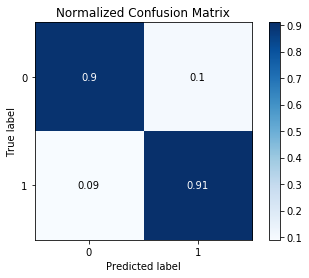

In [104]:
plot_confusion_matrix(test_data['y'],(preds>=0.5)*1,normalize=True)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


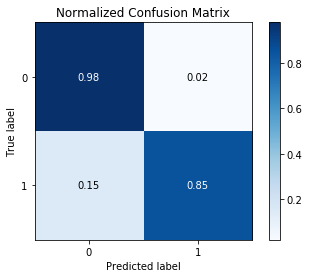

In [105]:
plot_confusion_matrix(val_data['y'],(model.predict(val_data['X_indices'])>=0.5)*1,normalize=True)

In [91]:
roc_auc_score(val_data['y'],model.predict(val_data['X_indices']))

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


0.9875213572949819

In [ ]:
def get_layer_output(model,layer,input_):
    get_layer_output = K.function([model.layers[0].input],
                      [model.layers[layer].output])

    layer_output = get_layer_output(input_)
    return layer_output[0]

In [19]:
trainer.model(n_units=256,
             add_recurrent_layer=True,
             dropout=0.4,
             spatial_dropout=0.4,
             hidden_dense_units=128,
             learning_rate=0.0017436142055397088,
             global_avg_pool=False,
             global_max_pool=False
    )



In [20]:
trainer.model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 115)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 115, 200)          238703000 
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 115, 200)          0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 115, 512)          935936    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 512)               1574912   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512 

In [21]:
trainer.fit_model(epochs=100,batch_size = 128)

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Prefet

Epoch 7/100
122920/122920 [==============================] - 103s 842us/sample - loss: 0.0769 - f1_metric: 0.8533 - auc_1: 0.9877 - val_loss: 0.0901 - val_f1_metric: 0.8509 - val_auc_1: 0.9834
Epoch 8/100
122920/122920 [==============================] - 101s 819us/sample - loss: 0.0720 - f1_metric: 0.8626 - auc_1: 0.9894 - val_loss: 0.0941 - val_f1_metric: 0.8357 - val_auc_1: 0.9830
Epoch 9/100
122920/122920 [==============================] - 101s 822us/sample - loss: 0.0650 - f1_metric: 0.8761 - auc_1: 0.9913 - val_loss: 0.0953 - val_f1_metric: 0.8371 - val_auc_1: 0.9839
Epoch 10/100
122920/122920 [==============================] - 101s 822us/sample - loss: 0.0606 - f1_metric: 0.8871 - auc_1: 0.9921 - val_loss: 0.0959 - val_f1_metric: 0.8507 - val_auc_1: 0.9848
Epoch 11/100
122920/122920 [==============================] - 101s 823us/sample - loss: 0.0548 - f1_metric: 0.8985 - auc_1: 0.9939 - val_loss: 0.0973 - val_f1_metric: 0.8420 - val_auc_1: 0.9790
Epoch 12/100
122920/122920 [=====

In [31]:
test = trainer.val_data['X_indices']
y_true = trainer.val_data['y'].astype('float32')

y_pred = trainer.model.predict(test)

score = f1_metric(y_true,y_pred).numpy()

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0


In [45]:
model = tf.keras.models.load_model('../../models/many_to_one_LSTM/model.h5',custom_objects={'f1_metric':f1_metric})

Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Reshape in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ReadVariableOp in device /job:lo

In [46]:
trainer.model = model

In [47]:
trainer.generate_metrics(trainer.val_data['X_indices'],y_test = trainer.val_data['y'])

Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ModelDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op __inference_distributed_function_143037 in device /job:localhost/replica:0/task:0/device:GPU:0


0.8555478

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(x='learning_rate',y='f1_val',data = results)
plt.xscale('log')
plt.axvline(3.5e-3)
plt.show()

In [ ]:
np.round(np.log10(3.5e-3),4)

In [43]:
os.getcwd()

'/home/samir/temp/toxic_comments/src/models'

In [ ]:
10**-2.5